In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from numpy import median
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import matplotlib.lines as mlines
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import os
%matplotlib inline

In C:\Users\Tamal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Tamal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Pre processing
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Categorical data points exploration
# Gender, Geography are the useful data points, where as surname is of no significance for the model.
dataset.groupby("Gender")["Geography"].count()

Gender
Female    4543
Male      5457
Name: Geography, dtype: int64

In [6]:
dataset.groupby("Geography")["Gender"].count()

Geography
France     5014
Germany    2509
Spain      2477
Name: Gender, dtype: int64

In [7]:
dataset["Gender1"] = dataset["Gender"]
dataset["Gender"] = pd.Categorical(dataset["Gender"])
dataset["Gender"] = dataset["Gender"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,Female
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,Female
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,Female
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,Female
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,Female


In [8]:
dataset["Geography1"] = dataset["Geography"]
dataset["Geography"] = pd.Categorical(dataset["Geography"])
dataset["Geography"] = dataset["Geography"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain


In [9]:
# Copy Dataset for creating models
dataset1 = dataset.copy() 
dataset1 = dataset1.drop(["CustomerId"], axis=1)
dataset1 = dataset1.drop(["Surname"], axis=1)
dataset1 = dataset1.drop(["RowNumber"], axis=1)
dataset1 = dataset1.drop(["Gender1"], axis=1)
dataset1 = dataset1.drop(["Geography1"], axis=1)
dataset1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Age binning
dataset["AgeBin"] = pd.cut(dataset['Age'], [0, 16, 32,48,64,500])
dataset["AgeBin"] = pd.Categorical(dataset["AgeBin"])
dataset["AgeBin"] = dataset["AgeBin"].cat.codes
dataset.loc[dataset["Age"] > 60].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin
42,43,15687946,Osborne,556,0,0,61,2,117419.35,1,1,1,94153.83,0,Female,France,3
44,45,15684171,Bianchi,660,2,0,61,5,155931.11,1,1,1,158338.39,0,Female,Spain,3
58,59,15623944,T'ien,511,2,0,66,4,0.00,1,1,0,1643.11,1,Female,Spain,4
85,86,15805254,Ndukaku,652,2,0,75,10,0.00,2,1,1,114675.75,0,Female,Spain,4
104,105,15804919,Dunbabin,670,2,0,65,1,0.00,1,1,1,177655.68,1,Female,Spain,4


In [11]:
# Binning credit score
dataset['CreditScoreBin'] = pd.cut(dataset['CreditScore'], [0, 450, 550,650,750,900])

dataset["CreditScoreBin"] = pd.Categorical(dataset["CreditScoreBin"])
dataset["CreditScoreBin"] = dataset["CreditScoreBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4


In [12]:
# Binning Balance
dataset['BalanceBin'] = pd.cut(dataset['Balance'], [-1, 50000, 100000,150000,200000,1000000000000000])

dataset["BalanceBin"] = pd.Categorical(dataset["BalanceBin"])
dataset["BalanceBin"] = dataset["BalanceBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin,BalanceBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2,0
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2,1
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1,3
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4,2


In [13]:
# Binning Estimated Salary
dataset['EstimatedSalaryBin'] = pd.cut(dataset['EstimatedSalary'], [-1, 50000, 100000,150000,200000,1000000000000000])

dataset["EstimatedSalaryBin"] = pd.Categorical(dataset["EstimatedSalaryBin"])
dataset["EstimatedSalaryBin"] = dataset["EstimatedSalaryBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin,BalanceBin,EstimatedSalaryBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2,0,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2,1,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1,3,2
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3,0,1
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4,2,1


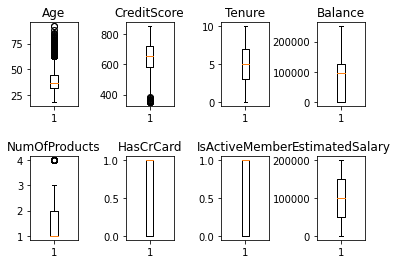

In [14]:
# Exploratory Analysis
# Box plot
fig, ((a,b,c,d),(e,f,g,h)) = plt.subplots(2,4)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=0.6)

a.set_title("Age")
a.boxplot(dataset["Age"])
b.set_title("CreditScore")
b.boxplot(dataset["CreditScore"])
c.set_title("Tenure")
c.boxplot(dataset["Tenure"])
d.set_title("Balance")
d.boxplot(dataset["Balance"])
e.set_title("NumOfProducts")
e.boxplot(dataset["NumOfProducts"])
f.set_title("HasCrCard")
f.boxplot(dataset["HasCrCard"])
g.set_title("IsActiveMember")
g.boxplot(dataset["IsActiveMember"])
h.set_title("EstimatedSalary")
h.boxplot(dataset["EstimatedSalary"])
plt.show()




In [15]:
# Correlation
dataset.corr()["Exited"]

RowNumber            -0.016571
CustomerId           -0.006248
CreditScore          -0.027094
Geography             0.035943
Gender               -0.106512
Age                   0.285323
Tenure               -0.014001
Balance               0.118533
NumOfProducts        -0.047820
HasCrCard            -0.007138
IsActiveMember       -0.156128
EstimatedSalary       0.012097
Exited                1.000000
AgeBin                0.256200
CreditScoreBin       -0.031312
BalanceBin            0.117289
EstimatedSalaryBin    0.013660
Name: Exited, dtype: float64

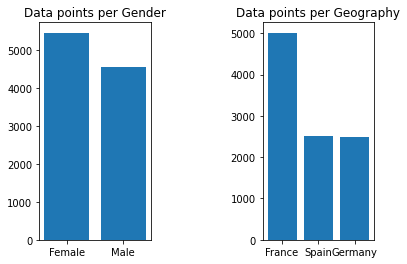

In [16]:
fig, ((a,b)) = plt.subplots(1,2)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)
a.set_title("Data points per Gender")
a.bar(dataset["Gender1"].unique(),dataset.iloc[:,14].value_counts())
b.set_title("Data points per Geography")
b.bar(dataset["Geography1"].unique(),dataset.iloc[:,15].value_counts())
plt.show()

In [17]:
# Remove the non-necessary fields
dataset = dataset.drop(["CustomerId"], axis=1)
dataset = dataset.drop(["Gender1"], axis=1)
dataset = dataset.drop(["Geography1"], axis=1)
dataset = dataset.drop(["Age"], axis=1)
dataset = dataset.drop(["CreditScore"], axis=1)
dataset = dataset.drop(["Balance"], axis=1)
dataset = dataset.drop(["EstimatedSalary"], axis=1)
dataset = dataset.drop(["Surname"], axis=1)
dataset = dataset.drop(["RowNumber"], axis=1)

In [18]:
# Random shuffle of records 
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [19]:
# Split data into train and test datasets
test_data_split = 0.2
x_train,x_test , y_train, y_test = train_test_split(dataset.drop(["Exited"],axis=1),dataset["Exited"],test_size = test_data_split)
x_test.describe()
# Split data into train and test datasets for decision tree
x_train_dt,x_test_dt , y_train_dt, y_test_dt = train_test_split(dataset1.drop(["Exited"],axis=1),dataset1["Exited"],test_size = test_data_split)

In [20]:
# feature importance analysis
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_train, y_train)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
d = {'columnName': x_train.columns.values, 'featureScore': fit.scores_}
df = pd.DataFrame(data=d)
df.sort_values(['featureScore'], ascending=False)

[ 11.862  45.888   3.161   4.019   0.628 100.437 135.05    2.472 108.578
   1.975]


,columnName,featureScore
6,AgeBin,135.049551
8,BalanceBin,108.577610
5,IsActiveMember,100.437013
1,Gender,45.887869
0,Geography,11.861520
3,NumOfProducts,4.019128
2,Tenure,3.160850
7,CreditScoreBin,2.471783
9,EstimatedSalaryBin,1.975356
4,HasCrCard,0.627896


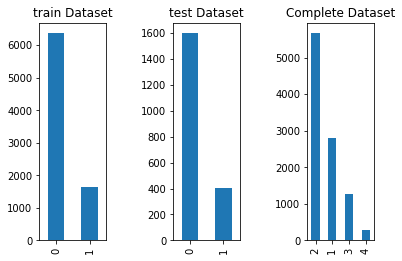

In [21]:
# Check the distribution of Exited in train & Test datasets
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)
plt.subplot(1,3,1)
y_train.iloc[:].value_counts().plot(kind = 'bar',title="train Dataset")
plt.subplot(1,3,2)
y_test.iloc[:].value_counts().plot(kind = 'bar',title="test Dataset")
plt.subplot(1,3,3)
dataset.iloc[:,7].value_counts().plot(kind = 'bar',title="Complete Dataset")
plt.show()

In [22]:
# Build model
# Logistic Regression

logreg = LogisticRegression(penalty = 'l2', C = 0.1,random_state = 0)
logreg.fit(x_train, y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Prediction
y_pred = logreg.predict(x_test)

In [24]:
# Accuracy metrics
acc_log = round(logreg.score(x_test, y_test), 3)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.816


array([[1561,   36],
       [ 333,   70]], dtype=int64)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(1561, 36, 333, 70)

0.728664633284182


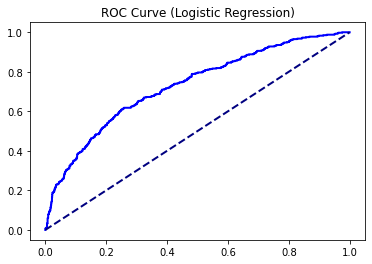

In [26]:
# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.title("ROC Curve (Logistic Regression)")
plt.plot(fpr, tpr, color='blue',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [27]:
# Decision Trees
clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 10, max_leaf_nodes=None)
model_tree = clf.fit(x_train_dt, y_train_dt)
print(model_tree)
# Predict test data
y_pred = model_tree.predict(x_test_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [28]:
# Predict
y_pred_dt = model_tree.predict(x_test_dt)

In [29]:
# Accuracy metrics
acc_log = accuracy_score(y_test_dt,y_pred_dt)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.835


array([[1376,  221],
       [ 349,   54]], dtype=int64)

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test_dt, y_pred_dt).ravel()
(tn, fp, fn, tp)

(1488, 93, 237, 182)

0.76638981098637


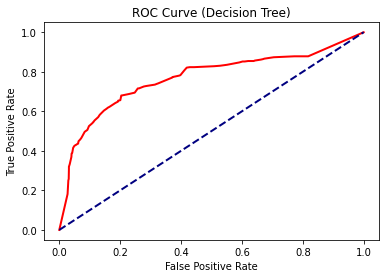

In [31]:
# ROC Curve for Decision Tree

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model_tree.predict_proba(x_test_dt)[::,1]
fpr, tpr, thresholds = roc_curve(y_test_dt, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (Decision Tree)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [32]:
# # ROC comparision among 6 models

# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# y_pred_proba_glm = logreg.predict_proba(x_test)[::,1]
# # y_pred_proba_nb = gnb.predict_proba(x_test)[::,1]
# # y_pred_proba_svm = model_svm.predict_proba(x_test)[::,1]
# y_pred_proba_decisionTree = model_tree.predict_proba(x_test_dt)[::,1]
# # y_pred_proba_knn = model_knn.predict_proba(x_test)[::,1]
# # y_pred_proba_neuralNet = model_neuralNet.predict_proba(x_test)[::,1]

# fpr[0], tpr[0], thresholds_glm = roc_curve(y_test, y_pred_proba_glm)
# # fpr[1], tpr[1], thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
# # fpr[2], tpr[2], thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
# fpr[3], tpr[3], thresholds_tree = roc_curve(y_test_dt, y_pred_proba_decisionTree)
# # fpr[4], tpr[4], thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
# # fpr[5], tpr[5], y_pred_proba_neuralNet = roc_curve(y_test, y_pred_proba_knn)

# roc_auc[0] = auc(fpr[0],tpr[0])
# # roc_auc[1] = auc(fpr[1],tpr[1])
# # roc_auc[2] = auc(fpr[2],tpr[2])
# roc_auc[3] = auc(fpr[3],tpr[3])
# # roc_auc[4] = auc(fpr[4],tpr[4])
# # roc_auc[5] = auc(fpr[5],tpr[5])
# print(roc_auc)
# colors = ['blue', 'red']
# titles = ["Logistic","Decision Tree"]
# plt.title("ROC Curve")
# for i in range(len(roc_auc)):
#     plt.plot(fpr[i], tpr[i], color=colors[i],lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
# blue_line = mlines.Line2D([], [], color='blue', label='Logistic regression')
# # orange_line = mlines.Line2D([], [], color='darkorange', label='Naive Bayes')
# # green_line = mlines.Line2D([], [], color='green', label='SVM')
# red_line = mlines.Line2D([], [], color='red', label='Decision Tree')
# # violet_line = mlines.Line2D([], [], color='violet', label='KNN')
# # purple_line = mlines.Line2D([], [], color='purple', label='NeuralNet')
# plt.legend(handles=[blue_line, red_line])
# plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
# plt.show()

In [33]:
# SVM
from sklearn import svm
model_svm = svm.SVC(probability=True, kernel='rbf', degree = 3)
model_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
# Predict SVM
y_pred = model_svm.predict(x_test)

In [35]:
# Accuracy metrics
acc_log = accuracy_score(y_test,y_pred)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.8055


array([[1597,    0],
       [ 389,   14]], dtype=int64)

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(1597, 0, 389, 14)

0.7929072967148392


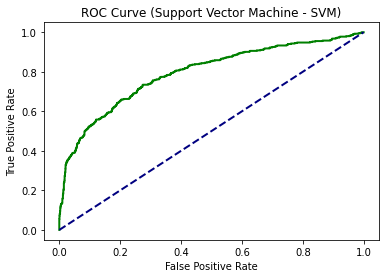

In [37]:
# ROC curve

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model_svm.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (Support Vector Machine - SVM)")
# plt.plot(roc.val, xlab = "Specificity (%)", ylab = "Sensitivity (%)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.plot(fpr, tpr, color='green',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [38]:
# Naive Bayes classification

gnb = GaussianNB(priors=None)
# Train classifier
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
# Predict 
y_pred = gnb.predict(x_test)

In [40]:
# Accuracy metrics
acc_log = accuracy_score(y_test,y_pred)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.827


array([[1576,   21],
       [ 325,   78]], dtype=int64)

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(1576, 21, 325, 78)

0.7852471523063561


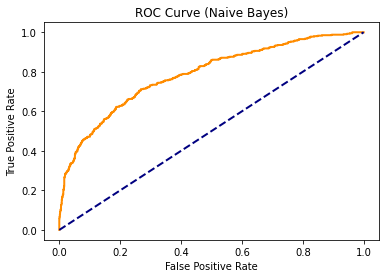

In [42]:
# ROC curve

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = gnb.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (Naive Bayes)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [43]:
# vowels list
vowels = []

# count element 'i'
count = vowels.count('i')

# print count
print('The count of i is:', count)

# count element 'p'
count = vowels.count('p')

# print count
print('The count of p is:', count)

The count of i is: 0
The count of p is: 0


{0: 0.7852471523063561, 1: 0.76638981098637}


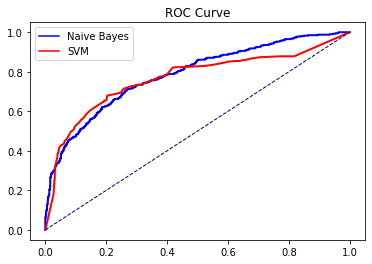

In [45]:
# ROC comparision among 6 models

fpr = dict()
tpr = dict()
roc_auc = dict()

# y_pred_proba_glm = logreg.predict_proba(x_test)[::,1]
y_pred_proba_nb = gnb.predict_proba(x_test)[::,1]
# y_pred_proba_svm = model_svm.predict_proba(x_test)[::,1]
y_pred_proba_decisionTree = model_tree.predict_proba(x_test_dt)[::,1]
# y_pred_proba_knn = model_knn.predict_proba(x_test)[::,1]
# y_pred_proba_neuralNet = model_neuralNet.predict_proba(x_test)[::,1]

# fpr[0], tpr[0], thresholds_glm = roc_curve(y_test, y_pred_proba_glm)
fpr[0], tpr[0], thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
# fpr[2], tpr[2], thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
fpr[1], tpr[1], thresholds_tree = roc_curve(y_test_dt, y_pred_proba_decisionTree)
# fpr[4], tpr[4], thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
# fpr[5], tpr[5], y_pred_proba_neuralNet = roc_curve(y_test, y_pred_proba_knn)

# roc_auc[0] = auc(fpr[0],tpr[0])
roc_auc[0] = auc(fpr[0],tpr[0])
# roc_auc[2] = auc(fpr[2],tpr[2])
roc_auc[1] = auc(fpr[1],tpr[1])
# roc_auc[4] = auc(fpr[4],tpr[4])
# roc_auc[5] = auc(fpr[5],tpr[5])
print(roc_auc)
colors = ['blue', 'red']
titles = ["Naive Bayes","SVM"]
plt.title("ROC Curve")
for i in range(len(roc_auc)):
    plt.plot(fpr[i], tpr[i], color=colors[i],lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
blue_line = mlines.Line2D([], [], color='blue', label='Naive Bayes')
orange_line = mlines.Line2D([], [], color='red', label='SVM')
# green_line = mlines.Line2D([], [], color='green', label='SVM')
# red_line = mlines.Line2D([], [], color='red', label='Decision Tree')
# violet_line = mlines.Line2D([], [], color='violet', label='KNN')
# purple_line = mlines.Line2D([], [], color='purple', label='NeuralNet')
plt.legend(handles=[blue_line, orange_line])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()